# Data Visualization in pandas and Seaborn

Today, we will continue our coverage of data visualization in Python, focusing on the functionlity within pandas and Seaborn.

Friendly Reminders:

* DataCamp Modules for matplotlib and customizing visualizations are due tonight by 11:59 p.m.
* Homework #5 is due tonight by 11:59 p.m.
* Homework #6 has been released and is due next Thursday (4/18) by 11:59 p.m.

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Data Visualization in pandas

As we have seen, matplotlib provides the low-level functionality for data visualization in Python. The advantage of matplotlib is that it offers full flexibility for developing visualizations ranging from very simple to very complex. The disadvantage is that we still need to write several-to-many lines of code to create an effective visualization.

pandas offers a simpler interface for creating visualizations, and in particular makes it easy to translate Series and DataFrame objects into visual representations very easily via the **.plot** method. The .plot method can be used to create our fundamental set of visualizations, as well as several other types (not listed):

* Line chart (line, default)
* Scatter plots (scatter)
* Histograms (hist) & boxplots (box)
* Column (bar) and bar (barh) charts

Similar to the previous class, let's create some synthetic data to explore the basic functionality:

In [2]:
n = 100
x = np.random.randn(n)
y = np.random.randn(n)

In [3]:
# Assemble data into DataFrame
df = pd.DataFrame({'x': x, 'y': y})
df.head()

,x,y
0,0.202477,1.748795
1,-0.363858,-0.293230
2,-0.389179,-1.025903
3,0.340967,0.852671
4,-0.090098,-1.329440


There are two methods for creating visualizations using the .plot method:

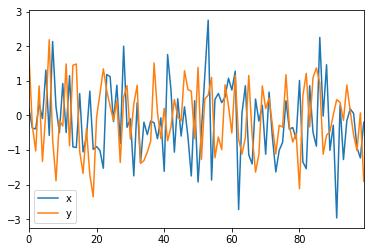

In [4]:
# kind argument
df.plot(kind='line');

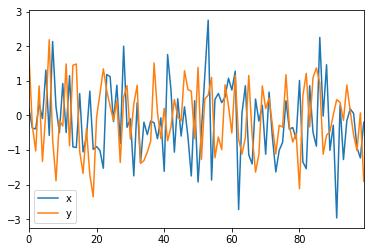

In [5]:
# plot function
df.plot.line();

Note that the name of the plot passed to the **kind** argument and the name of the function match in all cases.

The .plot method includes arguments for many of the same formatting and labeling tasks that we performed in matplotlib. Either approach can be applied to format and label your visualization.

* Figure formatting and layout: figsize, subplots/layout, sharex/y, title, legend
* Axes formatting: x/yticks, log scaling (logx/y, loglog), x/ylim, grid, rot
* Plot styling: matplotlib arguments such as color, marker, linestyle, linewidth (if applicable)

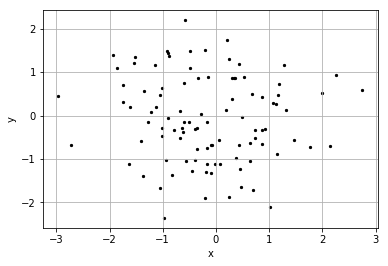

In [6]:
df.plot(kind='scatter', x='x', y='y', color='k', marker='.', grid=True);

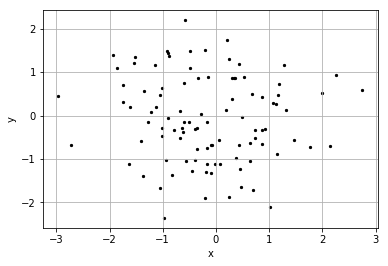

In [7]:
df.plot(kind='scatter', x='x', y='y', color='k', marker='.');
plt.grid(b=True)

Let's visualize our full random walk:

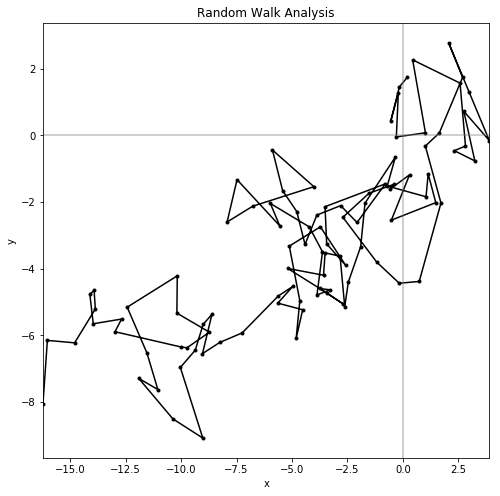

In [8]:
df.cumsum().plot(x='x', y='y', marker='.', color='k', title='Random Walk Analysis', legend=False, figsize=(8,8))
plt.axhline(0, color='0.5', alpha=0.5)
plt.axvline(0, color='0.5', alpha=0.5)
plt.ylabel('y');

Let's reload our tips data to continue exploring data visualization in pandas:

In [9]:
# path = '/Users/seanbarnes/Dropbox/Teaching/Courses/BUDT758X/data/'
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Similar to before, let's calculate the tip_pct to facilitate our analysis:

In [10]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
tips['tip_pct'].describe()

count    244.000000
mean      16.080258
std        6.107220
min        3.563814
25%       12.912736
50%       15.476977
75%       19.147549
max       71.034483
Name: tip_pct, dtype: float64

Let's visualize the distribution of tip_pct:

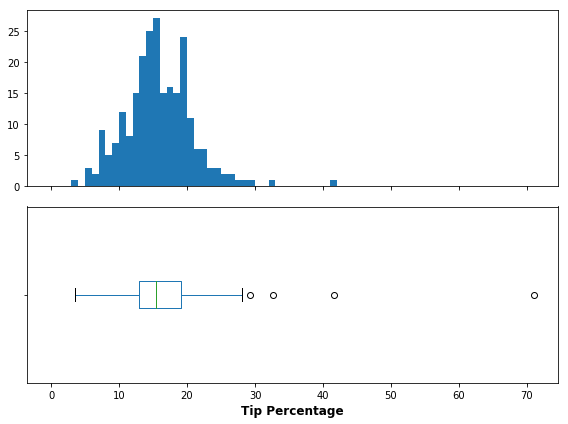

In [11]:
# Create figure with suplots
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,6))

# Histogram
tips['tip_pct'].plot.hist(bins=np.arange(tips['tip_pct'].max()), ax=ax[0])

# Boxplot
tips['tip_pct'].plot.box(vert=False, ax=ax[1])

# Adjust figure labels
ax[0].set_ylabel('')
ax[1].set_yticklabels('')
ax[1].set_xlabel('Tip Percentage', fontweight='bold', fontsize=12);

# Adjust subplot
plt.tight_layout()

In addition to the standard boxplot functionality in pandas, there is an additional boxplot method of Data Frames, which facilitates more flexible data visualization using boxplots.

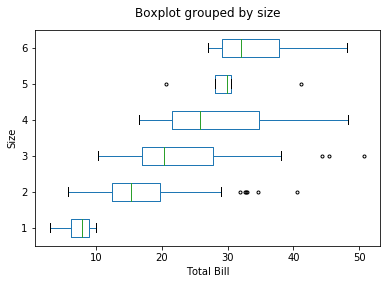

In [12]:
# GroupBy + Boxplots
tips.boxplot(column='total_bill', by='size', flierprops={'marker': '.'}, vert=False, grid=False)
plt.xlabel('Total Bill')
plt.ylabel('Size')
plt.title('');

Bar/column charts are one of the most natural visualizations to apply to analysis involving DataFrames, as we often perform descriptive analysis involving categorical variables.

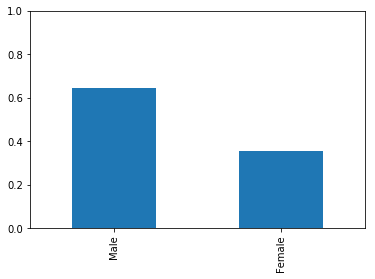

In [13]:
# Who's paying?
tips['sex'].value_counts(normalize=True).plot(kind='bar')
plt.ylim([0,1]);

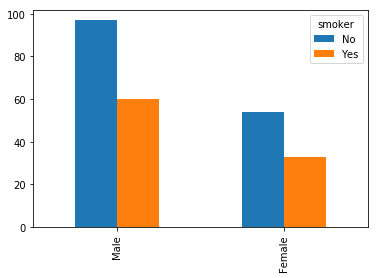

In [14]:
# Who's smoking? - Stacked
pd.crosstab(index=tips.sex, columns=tips.smoker).loc[['Male','Female']].plot(kind='bar')
plt.xlabel('');

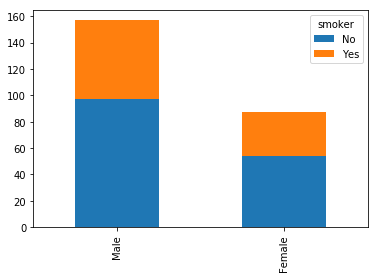

In [15]:
# Who's smoking? - Stacked
pd.crosstab(index=tips.sex, columns=tips.smoker).loc[['Male','Female']].plot(kind='bar', stacked=True)
plt.xlabel('');

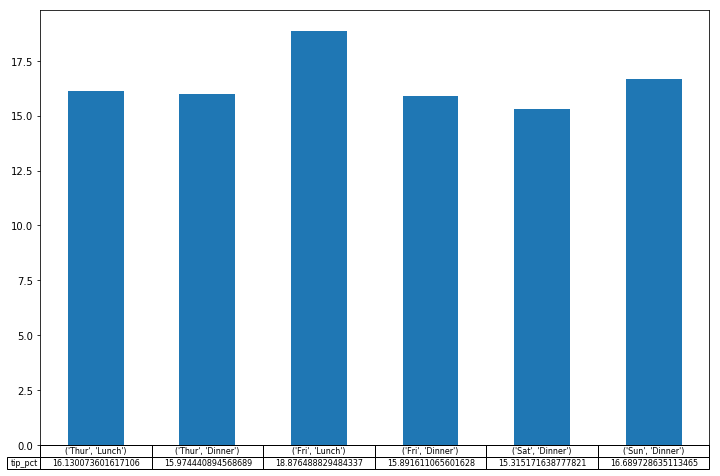

In [16]:
# Summarize tip_pct by day of the week
order = [('Thur','Lunch'),('Thur','Dinner'),('Fri','Lunch'),('Fri','Dinner'),('Sat','Dinner'),('Sun','Dinner')]
tips.groupby(by=['day','time'])['tip_pct'].mean().loc[order].plot(kind='bar', figsize=(12,8), table=True)
plt.xticks([])
plt.xlabel('');

## Introduction to Seaborn

Seaborn is our third and final data visualization package in Python. It began as a more aesthetically pleasing design framework built on top of matplotlib, but it also offers some convenient functionality for easily creating some fundamental visualizations along with some additional types of visualizations. Similar to matplotlib and pandas, we can use an object-oriented or state-based approach for creating our visualizations.

* Fundamental: Bar/column charts, histograms/boxplots
* New visualizations: Point plots, violin plots, rug/strip plots, heatmaps

There is also functionality for producing line charts (time series plots) and scatter plots, but there is not much value added over what matplotlib and pandas offer.

In addition to the specific types of visualizations, Seaborn also offers several functions for easily creating figures with multiple subplots (*data-aware grids*).

### Controlling Aesthetics

Similar to the matplotlib functionality for styling visualizations (plt.style), Seaborn also offers the ability to configure styling easily, via the sns.set_style function. Specifically, there are five available themes:

* white, whitegrid, ticks - White background with or without grid and/or ticks
* dark, darkgrid (default) - Gray background with or without grid

This styling applies to visualizations created using Seaborn functionality, but also matplotlib and pandas.

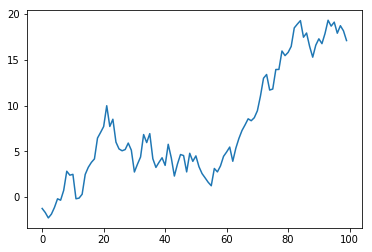

In [17]:
n = 100
s = np.arange(n)
x = np.random.randn(n).cumsum()
plt.plot(s, x);

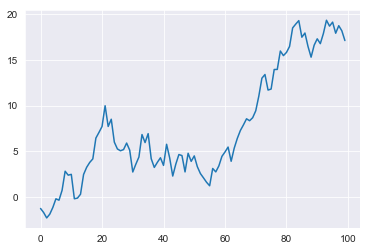

In [18]:
sns.set_style('darkgrid')
plt.plot(s, x);

In [19]:
# Set style to whitegrid
sns.set_style('white')

Seaborn also allows you to control the presence/absence of axes spines, with the sns.despine function. The primary reason for controlling these elements is related to the efficiency of our visualization. If a particular spine does not contribute in a meaningful way to the visualization, then perhaps it can be removed.

In [20]:
# Generate 5 samples of size n from the standard normal distribution
x = np.random.randn(n,5)

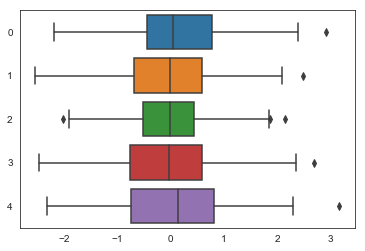

In [21]:
# Default boxplot styling
sns.boxplot(data=x, orient='h');

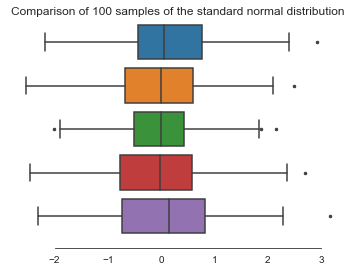

In [22]:
# Despined boxplot
sns.boxplot(data=x, orient='h', flierprops={'marker': '.'})
sns.despine(left=True, top=True, right=True, trim=True, offset=10)
plt.yticks([]);
plt.title('Comparison of %d samples of the standard normal distribution' % n);

Color is one of the most powerful encoding tools for enhancing the quality of a visualization. Aside from constant coloring (i.e., same coloring for all data elements), we can also use colormaps to convey additional information about the data being visualized. There are three primary categories of colormaps:

* Sequential: These are typically monochromatic color scales that use saturation to encode numerical or ordinal categorical data (e.g., from light to dark to represent small to large numbers)

* Diverging: These color scales are used to represent numerical data that is above or below a particular midpoint using distinct color scales (e.g., green for positive and red for negative numbers)

* Qualitative (Categorical): These color scales are often used to characterize different subsets of the data being visualized (e.g., categorical or nominal discrete), and vary more rapidly than sequential and diverging schemes

Colormaps are most often used on many of our fundamental visualizations, but also some of the new visualization types that we will discuss today. 

Some helpful references for color and colormaps:

* [matplotlib colormap reference](https://matplotlib.org/examples/color/colormaps_reference.html)
* [Seaborn reference for color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)
* [ColorBrewer 2.0](http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3)

Again, Seaborn styling has provided a quality set of defaults for color, but it also facilites the creation and usage of other configurations (e.g., hex color codes, circular color systems, matplotlib colormaps, ColorBrewer colormap, xkcd). Many of these arguments can be fed directly into the **palette** argument for many of the visualization functions (similar, some matplotlib functions have a cmap argument, e.g., plt.scatter).

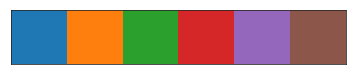

In [23]:
# Default colormap
current_palette = sns.color_palette(n_colors=6)
sns.palplot(current_palette)

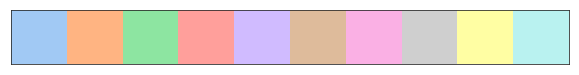

In [24]:
# Variations on the default theme - deep, muted, pastel, bright, dark, colorblind
sns.palplot(sns.color_palette('pastel'))

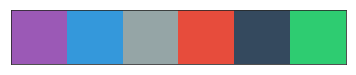

In [25]:
# Hex codes
hex_colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(hex_colors)

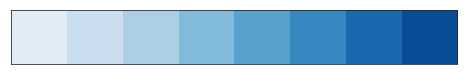

In [26]:
# Sequential colormap - see matplotlib and ColorBrewer2
sns.palplot(sns.color_palette("Blues", 8))

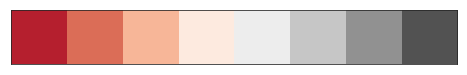

In [27]:
# Diverging colormap - see matplotlib and ColorBrewer2
sns.palplot(sns.color_palette("RdGy", 8))

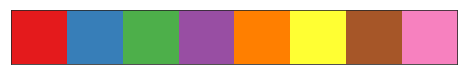

In [28]:
# Qualitative colormap - see matplotlib and ColorBrewer
sns.palplot(sns.color_palette("Set1", 8))

## 2-Minute Activity

Which type of colormap (sequential, diverging, qualitative) would be appropriate for our previous visualization of multiple boxplots?

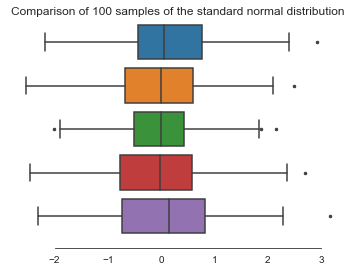

In [29]:
# Colormap for multiple boxplots - Specify using palette argument
sns.boxplot(data=x, orient='h', flierprops={'marker': '.'})
sns.despine(left=True, top=True, right=True, trim=True, offset=10)
plt.yticks([]);
plt.title('Comparison of %d samples of the standard normal distribution' % n);

## New Data Visualizations in Seaborn

For our remaining explorations today, we will use the Mid City data set (from your Data Models and Decisions text book).

In [31]:
# path = '/Users/seanbarnes/Dropbox/Teaching/Courses/BUDT758X/data/'
df = pd.read_csv('midcity.csv')
df.head()

,Home,Nbhd,Offers,SqFt,Brick,Bedrooms,Bathrooms,Price
0,1,2,2,1790,No,2,2,114300
1,2,2,3,2030,No,4,2,114200
2,3,2,1,1740,No,3,2,114800
3,4,2,3,1980,No,3,2,94700
4,5,2,3,2130,No,3,3,119800


In [32]:
# Let's add a new column that contains the discretized square footage of the home
df.insert(4, 'SqFtCat', pd.cut(df['SqFt'], np.arange(0,3500,250)))
df['SqFtCat'].value_counts().sort_index()

(0, 250]         0
(250, 500]       0
(500, 750]       0
(750, 1000]      0
(1000, 1250]     0
(1250, 1500]     1
(1500, 1750]    17
(1750, 2000]    49
(2000, 2250]    49
(2250, 2500]    10
(2500, 2750]     2
(2750, 3000]     0
(3000, 3250]     0
Name: SqFtCat, dtype: int64

### Point Plots

Point plots are essentially a variation on bar/column charts, and are used to visualize relationships between categorical and numerical variables. They are inspired by the concept of efficiency, in that the full bar/column is not needed to convey the necessary information about the numerical value. They are not to be confused with scatter plots, which again are used to visualize the relationship between two numerical variables.

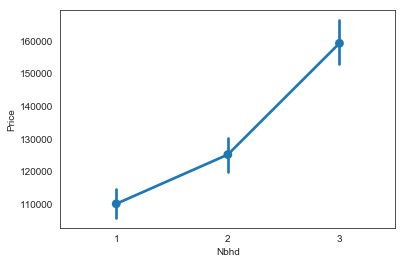

In [33]:
# Mean price and 95% CI for each neighborhood
sns.pointplot(x='Nbhd', y='Price', data=df);

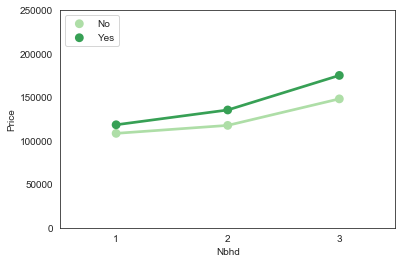

In [34]:
# Mean price for each neighborhood, categorized by Brick
sns.pointplot(x='Nbhd', y='Price', hue='Brick', ci=None, palette='Greens', data=df).legend(loc='upper left', frameon=True)
plt.ylim([0,250000]);

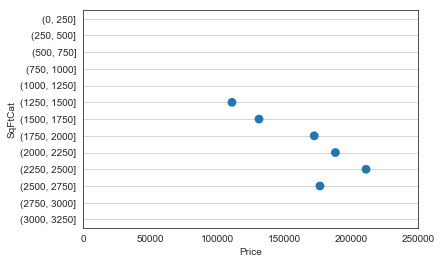

In [35]:
# Max price by square footage category
sns.pointplot(x='Price', y='SqFtCat', data=df, join=False, ci=None, estimator=max)
plt.grid(b=True, axis='y')
plt.xlim([0,250000]);

### Violin Plots

Violin plots are a variation on boxplots, that also provide information about the sample size through the range of the distribution. Wider areas of the plot indicate more observations in the data (typically toward the center of the distribution), whereas narrower areas indicate fewer observations (typically toward the outliers).

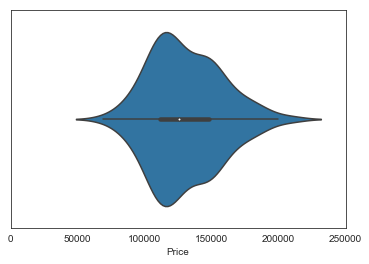

In [36]:
# Simple violin plot
sns.violinplot(df['Price'])
plt.xlim([0,250000]);

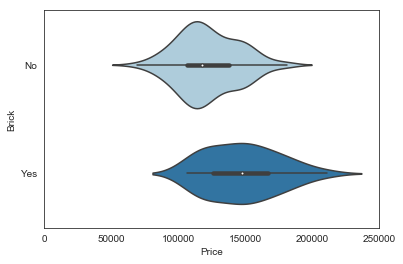

In [37]:
# Multiple violin plots
sns.violinplot(x='Price', y='Brick', data=df, palette='Paired')
plt.xlim([0,250000]);

### Rug/Strip Plots

Rug and strip plots are complementary to histograms and boxplots, respectively, and show the individual data points as opposed to the aggregated visualizations.

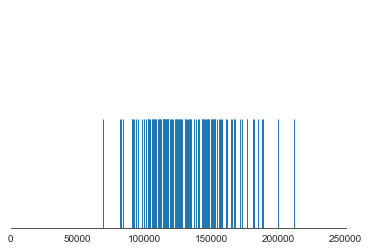

In [38]:
# Solo rug plot
sns.rugplot(df['Price'], height=0.5)
plt.xlim([0,250000])
plt.yticks([])
sns.despine(left=True)

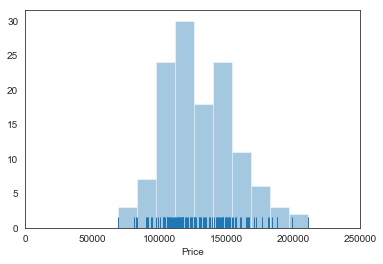

In [39]:
# Rug plot with histogram
sns.distplot(df['Price'], kde=False, rug=True)
plt.xlim([0,250000]);

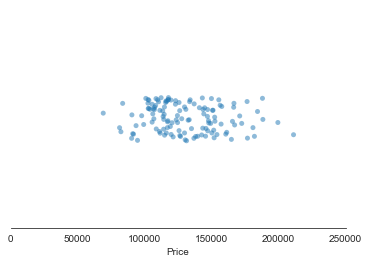

In [40]:
# Strip plot
sns.stripplot(df['Price'], alpha=0.5)
plt.xlim([0,250000])
plt.yticks([])
sns.despine(left=True)

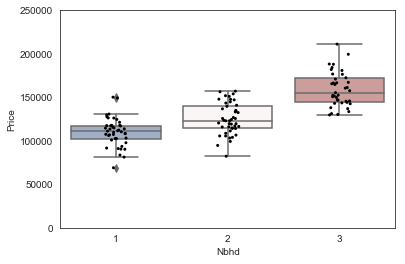

In [41]:
# Strip plot with boxplot
sns.boxplot(x='Nbhd', y='Price', data=df, palette='vlag')
sns.stripplot(x='Nbhd', y='Price', data=df, jitter=True, color='k', size=3)
plt.ylim([0,250000]);

### Heatmaps

Heatmaps are designed to compare the relationship between two categorical variables and a numerical variable. They are appropriate when a grouped bar/column chart has too many categories.

In [42]:
# GroupBy
table = df.groupby(['Bedrooms','Bathrooms'])['Price'].median().unstack()
table

Bathrooms,2,3,4
Bedrooms,,,
2,112900.0,118950.0,NaN
3,114700.0,135000.0,NaN
4,143350.0,160600.0,NaN
5,NaN,139600.0,199500.0


In [43]:
# Pivot table
table = df.pivot_table(index='Bedrooms', columns='Bathrooms', values='Price', aggfunc='median', fill_value=0)
table

Bathrooms,2,3,4
Bedrooms,,,
2,112900,118950,0
3,114700,135000,0
4,143350,160600,0
5,0,139600,199500


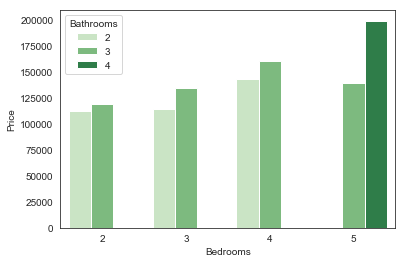

In [44]:
# Grouped bar plot
sns.barplot(x='Bedrooms', y='Price', hue='Bathrooms', data=df, palette='Greens', ci=None, estimator=np.median).legend(frameon=True, title='Bathrooms');

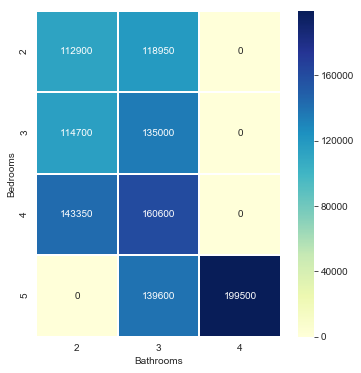

In [45]:
# Heatmap
plt.figure(figsize=(6,6))
sns.heatmap(table, cmap='YlGnBu', annot=True, fmt='d', square=True, linewidths=1);

## Data-Aware Grids

Seaborn offers several functions for creating data-aware grids:

* FacetGrid - Creates supblots for each subset of your data (also see sns.factorplot)
* PairGrid - Creates pairwise subplots for each pair of variables in your data (scatter matrix)

These functions primarily operate using the object-oriented approach.

For reference, please see https://seaborn.pydata.org/tutorial/axis_grids.html.

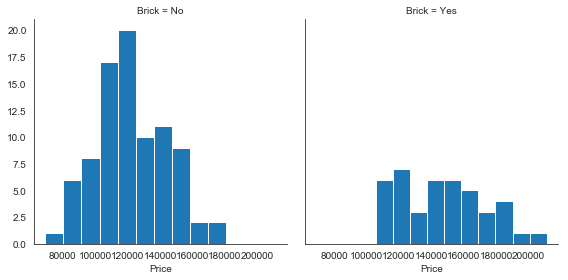

In [46]:
# FacetGrid - Histogram
g = sns.FacetGrid(df, col='Brick', sharex=True, height=4)
g.map(plt.hist, 'Price');

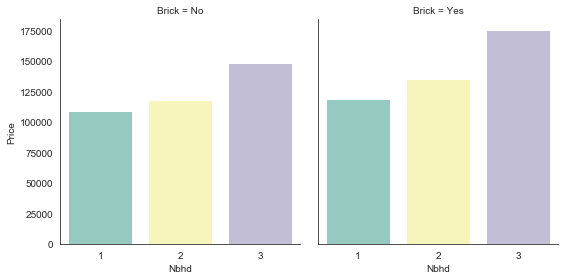

In [47]:
# FacetGrid - Column chart
g = sns.FacetGrid(df, col='Brick', sharey=True, height=4)
g.map(sns.barplot, 'Nbhd', 'Price', palette='Set3', order=[1,2,3], ci=None);

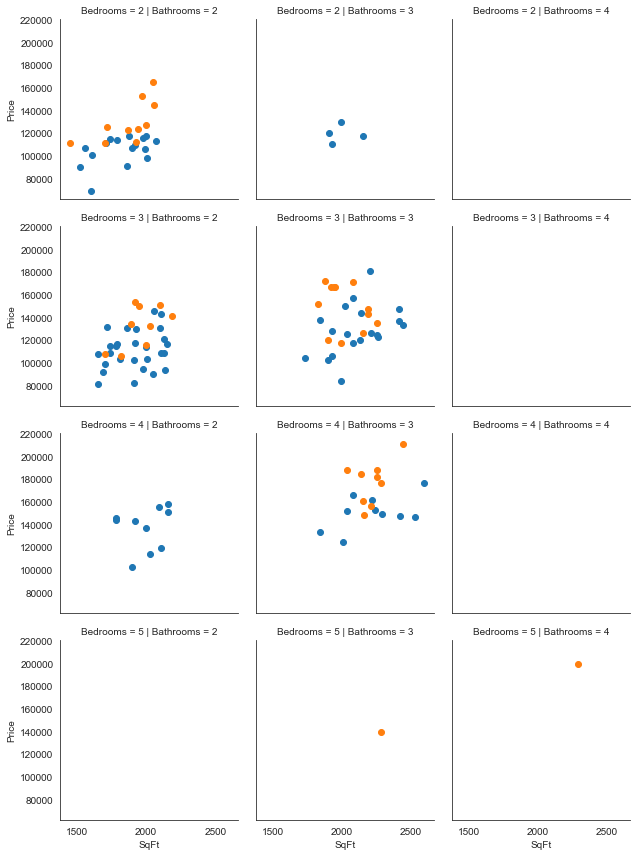

In [48]:
# FacetGrid - Scatter plot
g = sns.FacetGrid(df, row='Bedrooms', col='Bathrooms', hue='Brick', sharex=True, sharey=True, height=3)
g.map(plt.scatter, 'SqFt', 'Price');

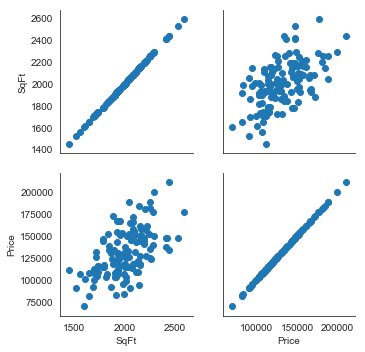

In [49]:
# PairGrid - Same plot type throughout
g = sns.PairGrid(df[['SqFt','Price']])
g.map(plt.scatter);

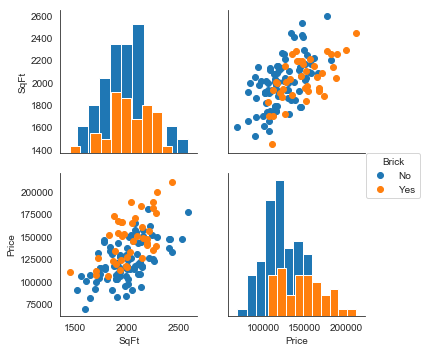

In [50]:
# PairGrid - Configure diagonal plots differently
g = sns.PairGrid(df, vars=['SqFt','Price'], hue='Brick')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);
g.add_legend(title='Brick', frameon=True);

## Data Visualization Recap

This concludes our coverage of data visualization in Python. With some practice, you will become very comfortable creating the fundamental set of visualizations in matplotlib, pandas, and Seaborn, and develop a preference for some of the functionality in each of the modules. For example, formatting, labeling, and annotation will typically be managed by matplotlib functionality, pandas and Seaborn interact nicely with Series and DataFrame objects, and Seaborn offers a lot of functionality for controlling aesthetics.

And remember, visualizations are tools for facilitating understanding and communicating meaningful insight. Remember, our three characteristics of a good visualization: effective storytelling, clarity, and efficiency!

## Next Time: Data Visualization Lab